# Imports

## Modules

In [50]:
#standard imports
import numpy as np 
import pandas as pd
import pingouin as pg 
import os
# Set OMP_NUM_THREADS to 1 to address the memory leak issue with KMeans on Windows
os.environ["OMP_NUM_THREADS"] = "1"
#data visual imports
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn imports 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#statistical imports
#statistical imports
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
from scipy.stats import shapiro, levene
from scipy.stats import boxcox
from scipy.stats import f_oneway

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Data

In [2]:
# call pandas read csv
df = pd.read_csv('data/wine-clustering.csv')
#call head()
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Inspect data

In [3]:
#call info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
#inspect duplicate values
print(f' Data contains {df.duplicated().sum()} duplicate values')

 Data contains 0 duplicate values


In [5]:
print(f'Data contains {df.isna().sum().sum()} missing values')

Data contains 0 missing values


# Clustering data

## Pre-process data

### Scale data

In [6]:
#call scaler
scaler = StandardScaler()
#scale dataframe
scaled_df = scaler.fit_transform(df)

### Principal Component Analysis (PCA)

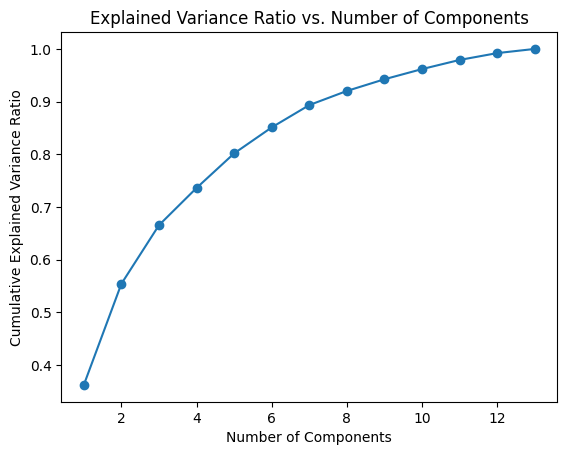

In [7]:
#call instance of pca
pca = PCA()
#fit data to scaled_df
pca.fit(scaled_df)
#Call plt plot to show cevr
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
        np.cumsum(pca.explained_variance_ratio_), marker='o')
#call axis labels
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
#call title
plt.title('Explained Variance Ratio vs. Number of Components')
#show plot
plt.show()

In [8]:
#call instance of pca
pca = PCA(n_components=5)
#fit data to scaled_df
pca_data = pca.fit(scaled_df)
#create dataframe
df_pca = pd.DataFrame(pca_data.fit_transform(scaled_df), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
#inspect dataframe
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458


## Plot inertia and silhouette scores

### Silhouette score

Text(0, 0.5, 'Silhouette Score')

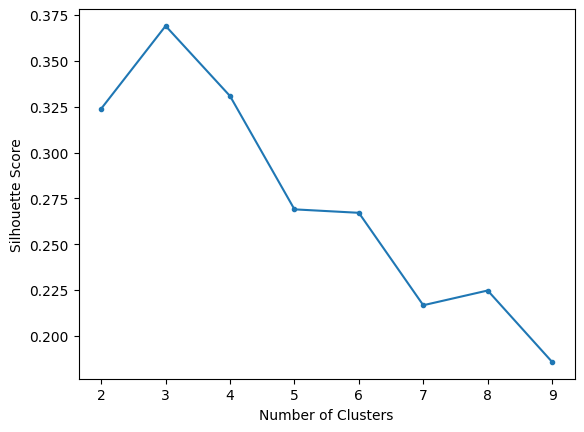

In [9]:
#call empty list 
silhouette_scores = []
#for loop to loop thru num_clusters
for k in range(2, 10): 
    km =KMeans(n_clusters=k) #call instance of model
    km.fit(scaled_df) #fit scaled data
    silhouette_scores.append(silhouette_score(df_pca, km.labels_)) #append scores to list
#call plt plot
plt.plot(range(2, 10), silhouette_scores, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

The plot elbows at 4, meaning 4 clusters would be optimal.

### Inertia score

Text(0, 0.5, 'Clusters')

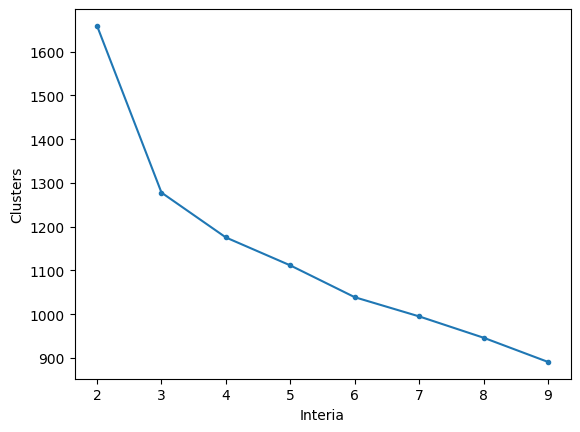

In [10]:
#save empty list for scores
inertias = []
#for loop to loop through num_clusters
for k in range(2,10):
    km = KMeans(n_clusters=k) #call instance of model
    km.fit(scaled_df) #fit scaled data
    inertias.append(km.inertia_) #save scores to list
#call plt plot
plt.plot(range(2, 10), inertias, marker='.')
#call axis labels
plt.xlabel('Interia')
plt.ylabel('Clusters')

The plot elbows at 3, implying 3 is the optimal cluster amount.

## KMeans Clustering

In [11]:
# call instance of kmeans
km = KMeans(n_clusters=3)
#fit pca data
km.fit(df_pca)
#call predictions on original data set
df['cluster'] = km.fit_predict(df_pca)
#inspect data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  cluster               178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


In [12]:
#print cluster values
df['cluster'].value_counts()

2    65
1    62
0    51
Name: cluster, dtype: int64

## Cluster Analysis

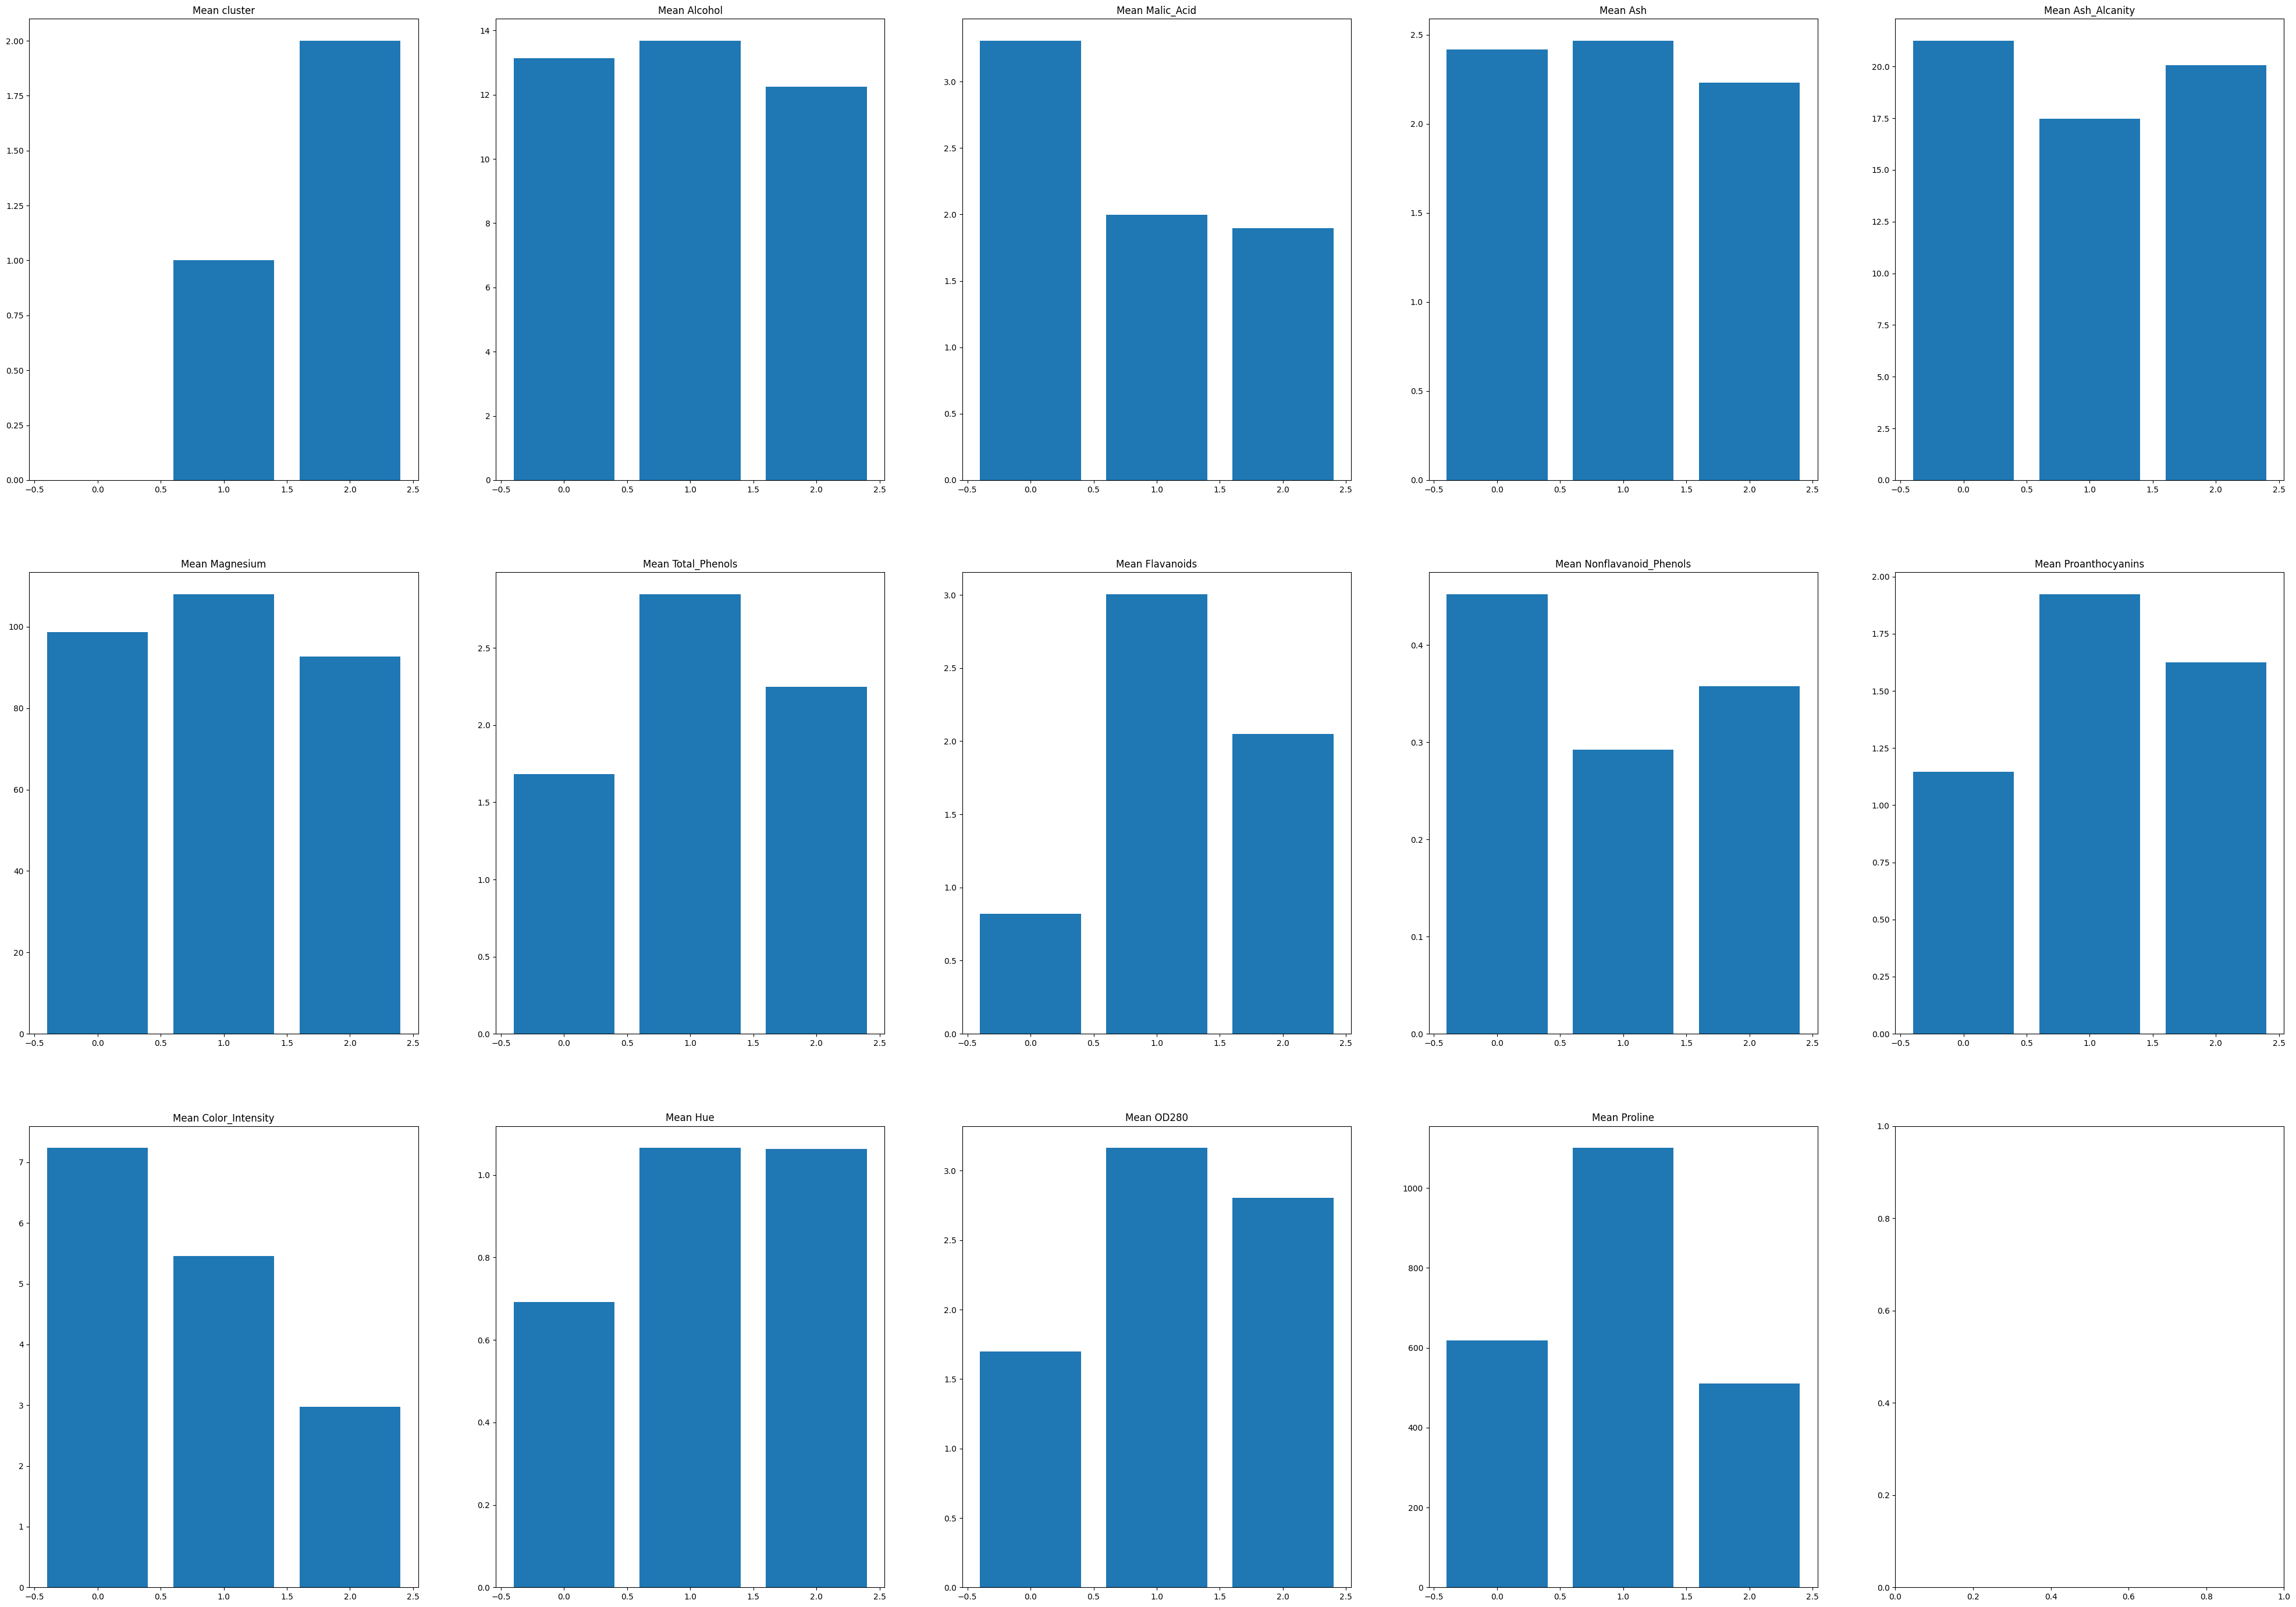

In [13]:
##### call groupby on clusters
cluster_groups = df.groupby('cluster', as_index=False).mean()
#call subplots
fig, axes = plt.subplots(3, 5, figsize=(50, 35))
#call ravel
axes = axes.ravel()
#enumerate through all features
for i, col in enumerate(cluster_groups.columns[0:14]):
    axes[i].bar(cluster_groups['cluster'], cluster_groups[col]) #call bar plot
    axes[i].set_title(f'Mean {col}') #set title for each plot

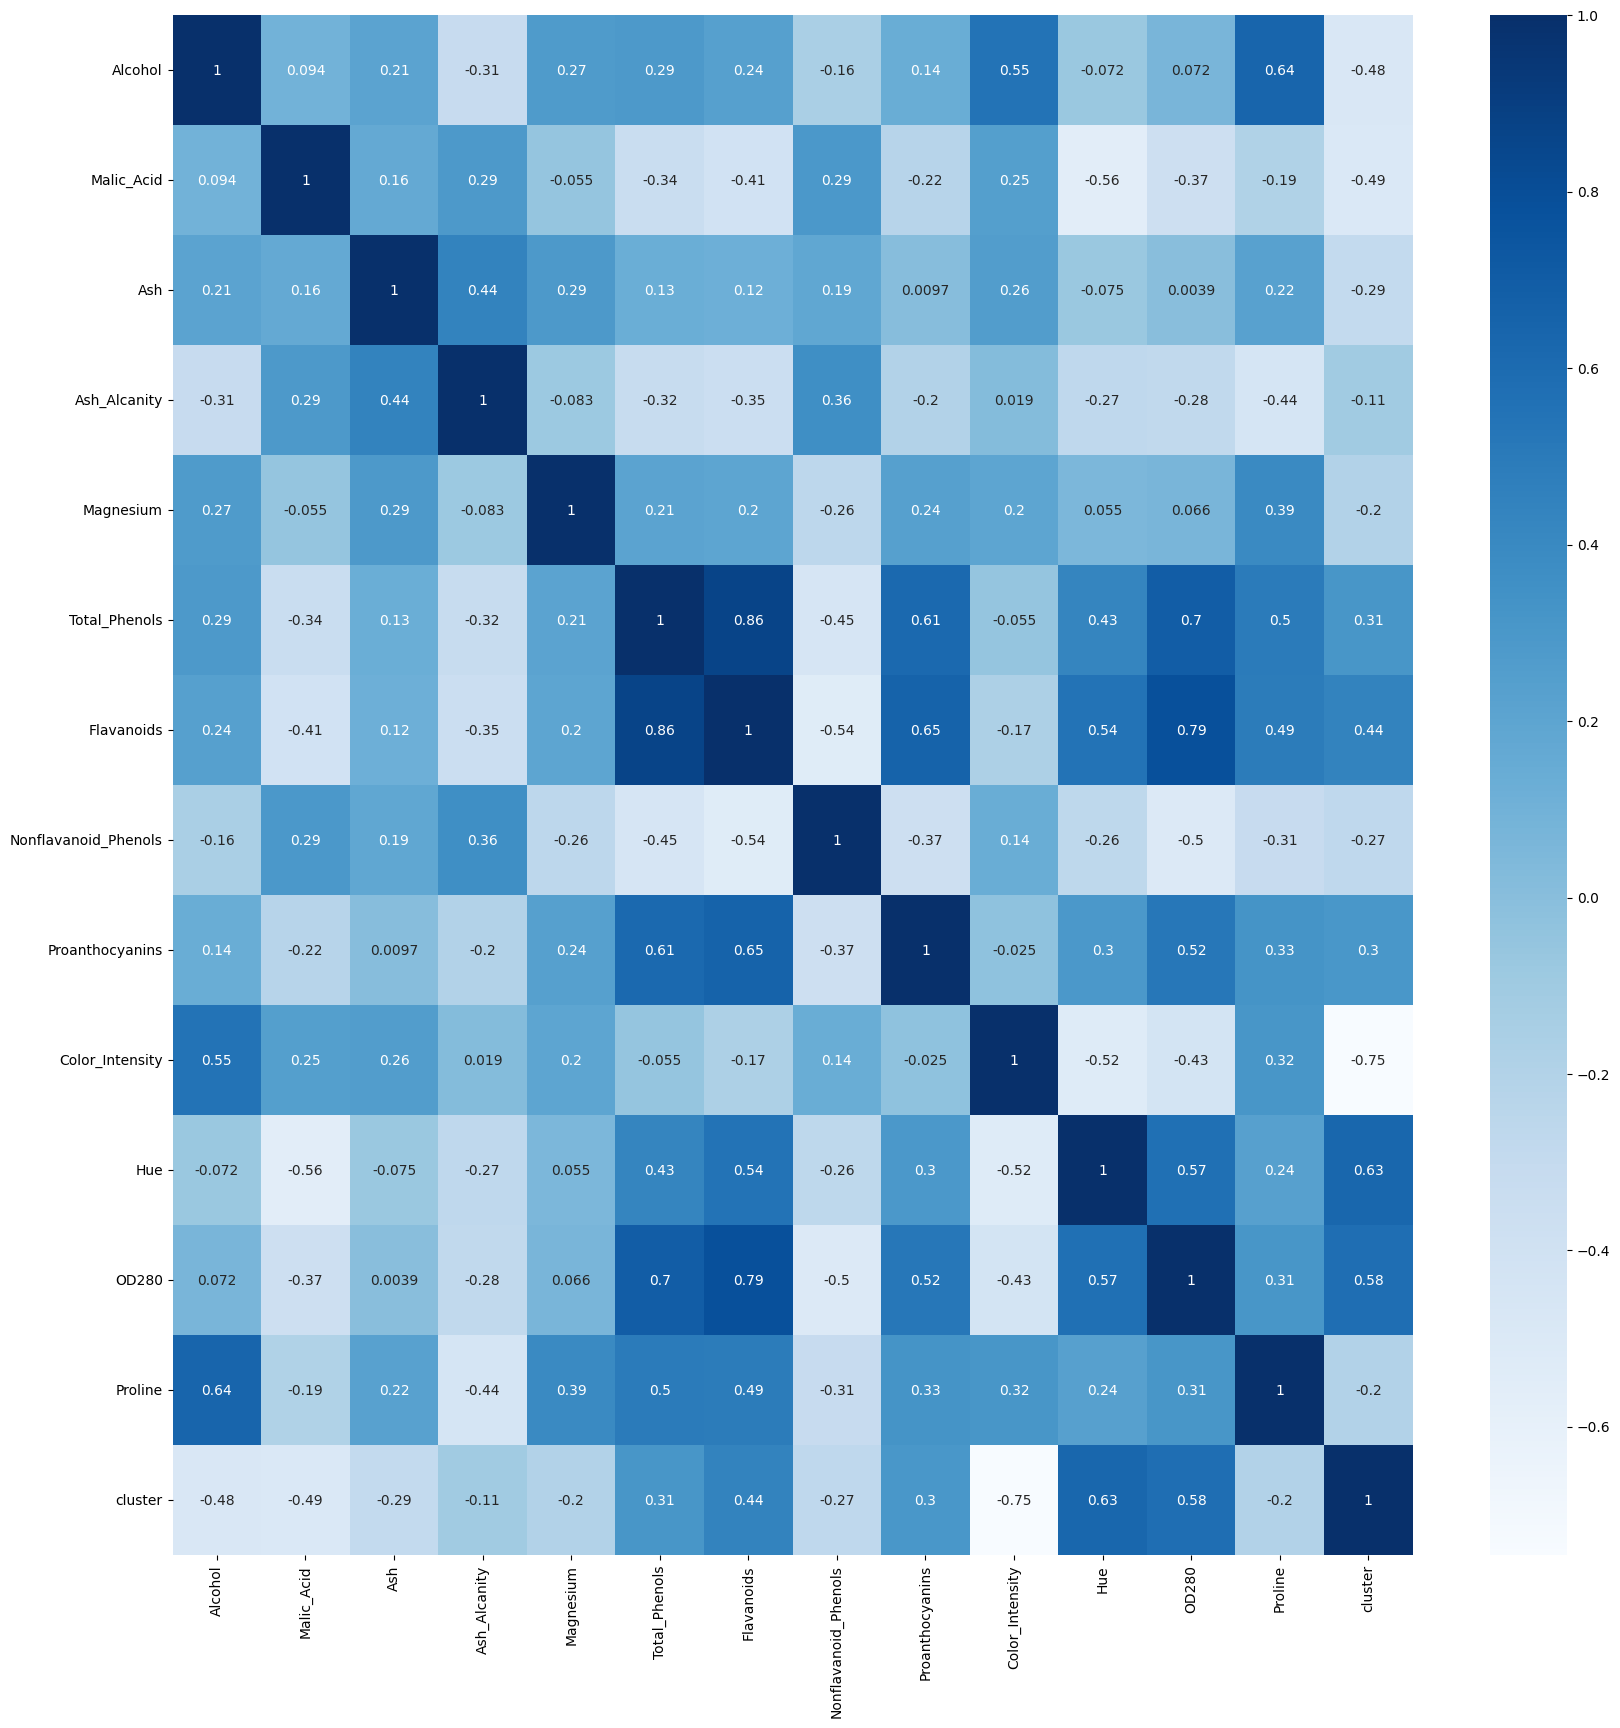

In [14]:
#call coor()
corr = df.corr()
#call plot
plt.figure(figsize=(20,20))
#call heatmap
sns.heatmap(corr, cmap='Blues', annot=True)
#show plot
plt.show()

Relationships were found between alcohol, malic acid, flavanoids, color intensity, hue, and OD280.

 **Alcohol**

- _Cluster 0_: Least amount of alcohol on average (12)
- _Cluster 1_: Most amount on average (14)
- _Cluster 2_: Middle amount on average (13)

***Malic Acid**

- _Cluster 0_: Lowest amount on average (1.9)
- _Cluster 1_: Middle amount on average (2)
- _Cluster 2_: Most amount on average (3.5)

**Flavanoids**

- _Cluster 0_: Middle amount on average (2.1)
- _Cluster 1_: Most amount on average (3)
- _Cluster 2_: Least amount on average (.6)

**Color Intensity**
- _Cluster 0_: Least amount on average (3)
- _Cluster 1_: Middle amount on average (5.2)
- _Cluster 2_: Most amount on average (7.2)

**Hue**
- _Cluster 0_: Tied for most (1)
- _Cluster 1_: Tied for most(1)
- _Cluster 2_: Least on average (.7)

**OD280**
- _Cluster 0_: Middle amount on average (2.7)
- _Cluster 1_: Most amount on average (3.2)
- _Cluster 2_: Least on average (1.6)

In [15]:
#call describe
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.078652
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.805696
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


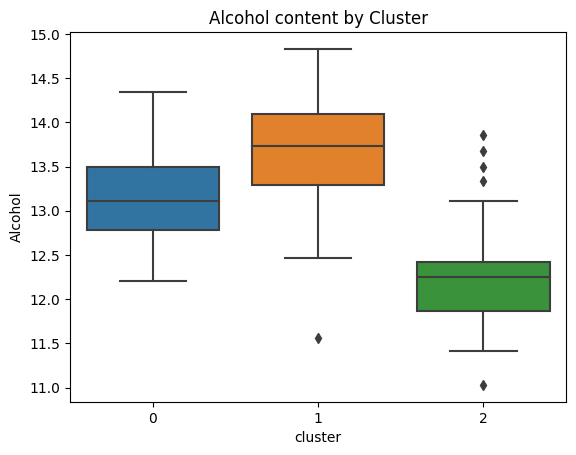

In [16]:
#call catplot
g = sns.boxplot(x='cluster', y='Alcohol', data=df)
#call title
g.set_title('Alcohol content by Cluster')
#show plot
plt.show()

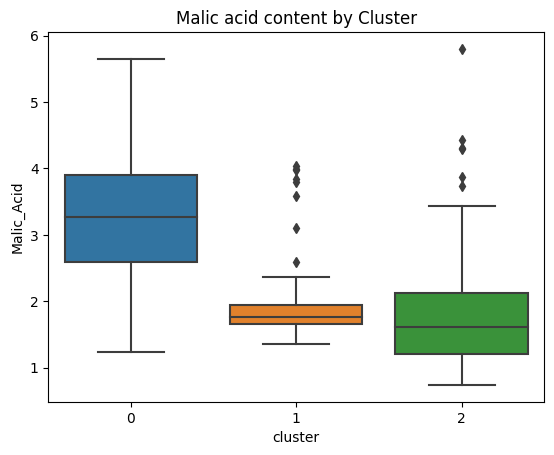

In [17]:
#call catplot
g = sns.boxplot(x='cluster', y='Malic_Acid', data=df)
#call title
g.set_title('Malic acid content by Cluster')
#show plot
plt.show()

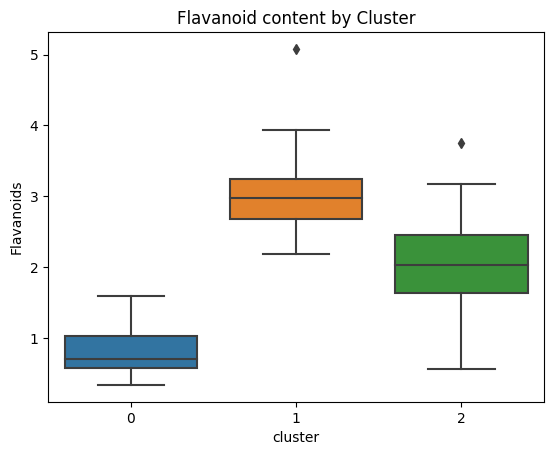

In [18]:
#call catplot
g = sns.boxplot(x='cluster', y='Flavanoids', data=df)
#call title
g.set_title('Flavanoid content by Cluster')
#show plot
plt.show()

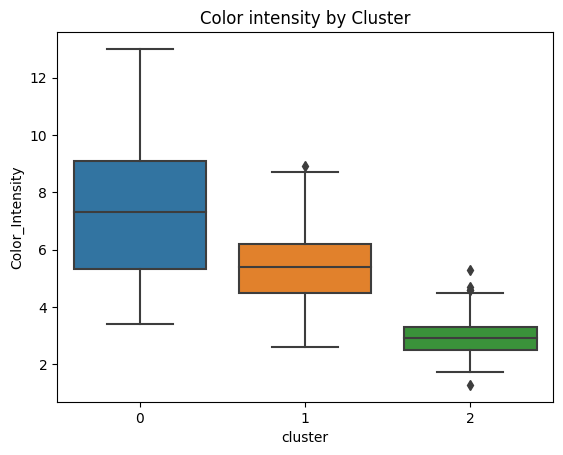

In [19]:
#call catplot
g = sns.boxplot(x='cluster', y='Color_Intensity', data=df)
#call title
g.set_title('Color intensity by Cluster')
#show plot
plt.show()

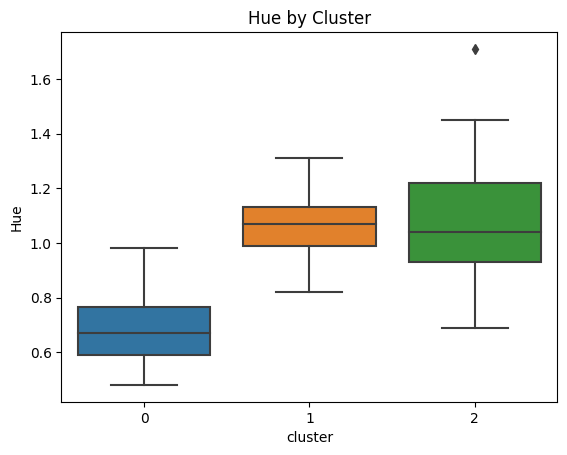

In [20]:
#call catplot
g = sns.boxplot(x='cluster', y='Hue', data=df)
#call title
g.set_title('Hue by Cluster')
#show plot
plt.show()

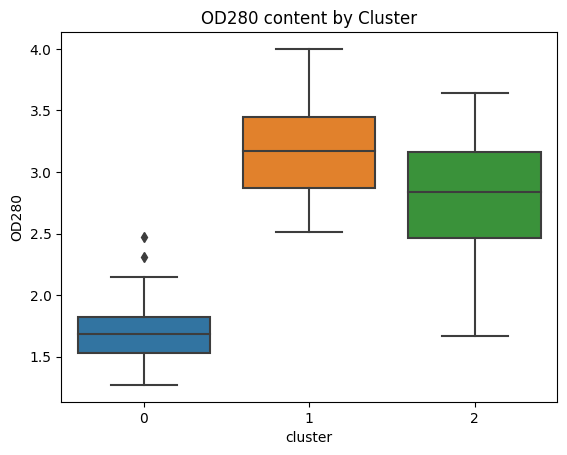

In [21]:
#call catplot
g = sns.boxplot(x='cluster', y='OD280', data=df)
#call title
g.set_title('OD280 content by Cluster')
#show plot
plt.show()

# Hypothesis Testing

## Test for outliers

In [22]:
#save copy of data 
df2 = df.copy()
#save zscore
zscores = stats.zscore(df)
#filter outlers 
df2 = df2[abs(zscores)<3]
#call info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            177 non-null    float64
 2   Ash                   175 non-null    float64
 3   Ash_Alcanity          177 non-null    float64
 4   Magnesium             176 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            177 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       177 non-null    float64
 9   Color_Intensity       177 non-null    float64
 10  Hue                   177 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  cluster               178 non-null    int32  
dtypes: float64(12), int32(1), int64(1)
memory usage: 18.9 KB


## Is there a significant difference between cluster group and alcohol?

**Null Hypothesis**:_There is no significant difference in alcohol between clusters_

**Alternate Hypothesis**:_There is a significant difference in alcohol between clusters_

**Alpha** = 0.05

In [23]:
#group data
grouped_data = [group['Alcohol'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61     12.64
 83     13.05
 118    12.77
 130    12.86
 131    12.88
 132    12.81
 133    12.70
 134    12.51
 135    12.60
 136    12.25
 137    12.53
 138    13.49
 139    12.84
 140    12.93
 141    13.36
 142    13.52
 143    13.62
 144    12.25
 145    13.16
 146    13.88
 147    12.87
 148    13.32
 149    13.08
 150    13.50
 151    12.79
 152    13.11
 153    13.23
 154    12.58
 155    13.17
 156    13.84
 157    12.45
 158    14.34
 159    13.48
 160    12.36
 161    13.69
 162    12.85
 163    12.96
 164    13.78
 165    13.73
 166    13.45
 167    12.82
 168    13.58
 169    13.40
 170    12.20
 171    12.77
 172    14.16
 173    13.71
 174    13.40
 175    13.27
 176    13.17
 177    14.13
 Name: Alcohol, dtype: float64,
 0      14.23
 1      13.20
 2      13.16
 3      14.37
 4      13.24
        ...  
 57     13.29
 58     13.72
 73     12.99
 95     12.47
 121    11.56
 Name: Alcohol, Length: 62, dtype: float64,
 59     12.37
 60     12.33
 62     13.67
 63     12.37


### Test for normality

In [24]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: False
Significance: True
Significance: True


Only one sample passed the test for normality. The samples are large enough to continue.

### Test for equal variance

In [25]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: False


The p-value is greater than 0.05, meaning we fail to reject the null hypothesis that our samples have equal variance.

### Anova test

In [26]:
#call f_oneway
result = f_oneway(*grouped_data)
#call if else statement to see result
if result.pvalue < 0.05:
    print("There is a significant difference in alcohol content")
else:
    print("There is no significant difference in alcohol content")

There is a significant difference in alcohol content


Our p-value is less than 0.05, meaning we reject the null hypothesis that there is no significant difference.

## Is there a significant difference between cluster group and malic acid content?

**Null Hypothesis**:_There is no significant difference in malic acid between clusters_

**Alternate Hypothesis**:_There is a significant difference in malic acid between clusters_

**Alpha** = 0.05

In [27]:
#group data
grouped_data = [group['Malic_Acid'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61     1.36
 83     3.86
 118    3.43
 130    1.35
 131    2.99
 132    2.31
 133    3.55
 134    1.24
 135    2.46
 136    4.72
 137    5.51
 138    3.59
 139    2.96
 140    2.81
 141    2.56
 142    3.17
 143    4.95
 144    3.88
 145    3.57
 146    5.04
 147    4.61
 148    3.24
 149    3.90
 150    3.12
 151    2.67
 152    1.90
 153    3.30
 154    1.29
 155    5.19
 156    4.12
 157    3.03
 158    1.68
 159    1.67
 160    3.83
 161    3.26
 162    3.27
 163    3.45
 164    2.76
 165    4.36
 166    3.70
 167    3.37
 168    2.58
 169    4.60
 170    3.03
 171    2.39
 172    2.51
 173    5.65
 174    3.91
 175    4.28
 176    2.59
 177    4.10
 Name: Malic_Acid, dtype: float64,
 0      1.71
 1      1.78
 2      2.36
 3      1.95
 4      2.59
        ... 
 57     1.97
 58     1.43
 73     1.67
 95     1.52
 121    2.05
 Name: Malic_Acid, Length: 62, dtype: float64,
 59     0.94
 60     1.10
 62     1.25
 63     1.13
 64     1.45
        ... 
 125    2.16
 126    1.53
 127    

### Test for normality

In [28]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: False
Significance: True
Significance: False


Only 2 samples passed the test for normality. Our samples are large enough to continue.

### Test for equal variance

In [29]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: False


Our pvalue is greater than .05, meaning we fail to reject the null hypothesis that our samples have equal variance

### Anova test

In [30]:
#call f_oneway
result = f_oneway(*grouped_data)
#call if else statement to see result
if result.pvalue < 0.05:
    print("There is a significant difference in malic acid")
else:
    print("There is no significant difference in malic acid")

There is no significant difference in malic acid


## Is there a significant difference between cluster group and flavanoids?

**Null Hypothesis**:_There is no significant difference in flavanoids between clusters_

**Alternate Hypothesis**:_There is a significant difference in flavanoids between clusters_

**Alpha** = 0.05

In [31]:
#group data
grouped_data = [group['Flavanoids'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61     1.41
 83     1.59
 118    1.25
 130    1.25
 131    1.22
 132    1.09
 133    1.20
 134    0.58
 135    0.66
 136    0.47
 137    0.60
 138    0.48
 139    0.60
 140    0.50
 141    0.50
 142    0.52
 143    0.80
 144    0.78
 145    0.55
 146    0.34
 147    0.65
 148    0.76
 149    1.39
 150    1.57
 151    1.36
 152    1.28
 153    0.83
 154    0.58
 155    0.63
 156    0.83
 157    0.58
 158    1.31
 159    1.10
 160    0.92
 161    0.56
 162    0.60
 163    0.70
 164    0.68
 165    0.47
 166    0.92
 167    0.66
 168    0.84
 169    0.96
 170    0.49
 171    0.51
 172    0.70
 173    0.61
 174    0.75
 175    0.69
 176    0.68
 177    0.76
 Name: Flavanoids, dtype: float64,
 0      3.06
 1      2.76
 2      3.24
 3      3.49
 4      2.69
        ... 
 57     3.23
 58     3.67
 73     2.89
 95     2.27
 121     NaN
 Name: Flavanoids, Length: 62, dtype: float64,
 59     0.57
 60     1.09
 62     1.79
 63     3.10
 64     1.75
        ... 
 125    2.65
 126    3.15
 127    

### Test for normality

In [32]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: True
Significance: False
Significance: False


### Test for equal variance

In [33]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: False


### Anova test

In [34]:
#call f_oneway
result = f_oneway(*grouped_data)
#call if else statement to see result
if result.pvalue < 0.05:
    print("There is a significant difference in flavanoids")
else:
    print("There is no significant difference in flavanoids")

There is no significant difference in flavanoids


## Is there a significant difference between cluster group and color intensity

**Null Hypothesis**:_There is no significant difference in color intensity between clusters_

**Alternate Hypothesis**:_There is a significant difference in color intensity between clusters_

**Alpha** = 0.05

In [38]:
#group data
grouped_data = [group['Color_Intensity'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61      5.750000
 83      4.800000
 118     3.400000
 130     4.100000
 131     5.400000
 132     5.700000
 133     5.000000
 134     5.450000
 135     7.100000
 136     3.850000
 137     5.000000
 138     5.700000
 139     4.920000
 140     4.600000
 141     5.600000
 142     4.350000
 143     4.400000
 144     8.210000
 145     4.000000
 146     4.900000
 147     7.650000
 148     8.420000
 149     9.400000
 150     8.600000
 151    10.800000
 152     7.100000
 153    10.520000
 154     7.600000
 155     7.900000
 156     9.010000
 157     7.500000
 158          NaN
 159    11.750000
 160     7.650000
 161     5.880000
 162     5.580000
 163     5.280000
 164     9.580000
 165     6.620000
 166    10.680000
 167    10.260000
 168     8.660000
 169     8.500000
 170     5.500000
 171     9.899999
 172     9.700000
 173     7.700000
 174     7.300000
 175    10.200000
 176     9.300000
 177     9.200000
 Name: Color_Intensity, dtype: float64,
 0      5.64
 1      4.38
 2      5.68
 3 

### Test for normality

In [39]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: False
Significance: False
Significance: True


### Test for equal variance

In [40]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: False


### Anova test

In [41]:
#call f_oneway
result = f_oneway(*grouped_data)
#call if else statement to see result
if result.pvalue < 0.05:
    print("There is a significant difference in color intensity")
else:
    print("There is no significant difference in color intensity")

There is no significant difference in color intensity


## Is there a significant difference between cluster group and hue?

**Null Hypothesis**:_There is no significant difference in hue between clusters_

**Alternate Hypothesis**:_There is a significant difference in hue between clusters_

**Alpha** = 0.05

In [42]:
#group data
grouped_data = [group['Hue'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61     0.98
 83     0.84
 118    0.70
 130    0.76
 131    0.74
 132    0.66
 133    0.78
 134    0.75
 135    0.73
 136    0.75
 137    0.82
 138    0.81
 139    0.89
 140    0.77
 141    0.70
 142    0.89
 143    0.91
 144    0.65
 145    0.60
 146    0.58
 147    0.54
 148    0.55
 149    0.57
 150    0.59
 151    0.48
 152    0.61
 153    0.56
 154    0.58
 155    0.60
 156    0.57
 157    0.67
 158    0.57
 159    0.57
 160    0.56
 161    0.96
 162    0.87
 163    0.68
 164    0.70
 165    0.78
 166    0.85
 167    0.72
 168    0.74
 169    0.67
 170    0.66
 171    0.57
 172    0.62
 173    0.64
 174    0.70
 175    0.59
 176    0.60
 177    0.61
 Name: Hue, dtype: float64,
 0      1.04
 1      1.05
 2      1.03
 3      0.86
 4      1.04
        ... 
 57     1.07
 58     0.89
 73     1.31
 95     1.16
 121    0.93
 Name: Hue, Length: 62, dtype: float64,
 59     1.05
 60     1.25
 62     1.23
 63     1.22
 64     1.45
        ... 
 125    0.86
 126    0.69
 127    0.97
 128    0

### Test for normality

In [43]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: True
Significance: False
Significance: False


### Test for equal variance

In [44]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: False


### Anova test

In [45]:
#call f_oneway
result = f_oneway(*grouped_data)
#call if else statement to see result
if result.pvalue < 0.05:
    print("There is a significant difference in hue")
else:
    print("There is no significant difference in hue")

There is no significant difference in hue


## Is there a significant difference between cluster group and OD280?

**Null Hypothesis**:_There is no significant difference in OD280 between clusters_

**Alternate Hypothesis**:_There is a significant difference in OD280 between clusters_

**Alpha** = 0.05

In [46]:
#group data
grouped_data = [group['OD280'] for name, group in df2.groupby('cluster')]
#inspect
grouped_data

[61     1.59
 83     2.01
 118    2.12
 130    1.29
 131    1.42
 132    1.36
 133    1.29
 134    1.51
 135    1.58
 136    1.27
 137    1.69
 138    1.82
 139    2.15
 140    2.31
 141    2.47
 142    2.06
 143    2.05
 144    2.00
 145    1.68
 146    1.33
 147    1.86
 148    1.62
 149    1.33
 150    1.30
 151    1.47
 152    1.33
 153    1.51
 154    1.55
 155    1.48
 156    1.64
 157    1.73
 158    1.96
 159    1.78
 160    1.58
 161    1.82
 162    2.11
 163    1.75
 164    1.68
 165    1.75
 166    1.56
 167    1.75
 168    1.80
 169    1.92
 170    1.83
 171    1.63
 172    1.71
 173    1.74
 174    1.56
 175    1.56
 176    1.62
 177    1.60
 Name: OD280, dtype: float64,
 0      3.92
 1      3.40
 2      3.17
 3      3.45
 4      2.93
        ... 
 57     2.84
 58     2.87
 73     3.50
 95     2.63
 121    3.69
 Name: OD280, Length: 62, dtype: float64,
 59     1.82
 60     1.67
 62     2.46
 63     2.87
 64     2.23
        ... 
 125    3.28
 126    2.84
 127    2.44
 128 

### Test for normality

In [47]:
#Shapiro-Wilk normality test
for group in grouped_data:
    stat, p_value = shapiro(group)
    print(f"Significance: {p_value<.05}")

Significance: False
Significance: False
Significance: False


### Test for equal variance

In [48]:
#call levene test
stat, p_value = levene(*grouped_data)
#print results
print(f"Significance: {p_value<.05}")

Significance: True


### Anova test

In [57]:
#perform welch's ANOVA
pg.welch_anova(dv='OD280', between='cluster', data=df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,cluster,2,116.262123,326.836242,1.877121e-48,0.716854


In [55]:
#convert scientific notation to number
"{:.30f}".format(float("1.877121e-48"))

'0.000000000000000000000000000000'